In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import json
from pre_processor import slice_lot

In [2]:
from tensorflow import keras
model = keras.models.load_model('saved_model_1')

In [3]:
batch_size = 32
img_height = 98
img_width = 54

num_classes = 6

json_full_filename = './3DEnviornment/HackTJ8.0/Assets/TrainingImages/image_dictionary.json'
with open(json_full_filename) as f:
    json_object = json.load(f)
    all_car_models, _image_filename_labels = json_object['all_car_models'], json_object['image_filename_labels']
    
class_names = sorted(all_car_models)
print(class_names)

['Blue', 'Brown', 'Empty', 'Green', 'Purple', 'Yellow']


In [4]:
def analyze_space(img):
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # print(
    #     "This image most likely belongs to {} with a {:.2f} percent confidence."
    #     .format(class_names[np.argmax(score)], 100 * np.max(score))
    # )
    return np.argmax(score)

In [5]:
def analyze_parking_lot(lot_image):
    spaces = slice_lot(lot_image)
    cars_in_lots = [analyze_space(image) for image in spaces]
    cars_in_lots = [class_names[elem] for elem in cars_in_lots]
    return cars_in_lots

In [6]:
from sheet_manager import SheetManager
sheet_manager = SheetManager()

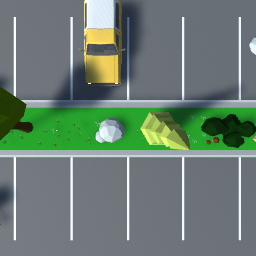

In [9]:
lot_image = PIL.Image.open('./3DEnviornment/HackTJ8.0/Assets/TrainingImages/28.jpg')
result = analyze_parking_lot(lot_image)
lot_image

# lot_image
# sheet_manager.add_scene(result)